<h1 style='color: green; font-size: 36px; font-weight: bold;'>Logística Litro de Luz Nacional - Estimação do custo de frete</h1>

# <font color='red' style='font-size: 30px;'>1.2 Conhecendo o Dataset</font>
<hr style='border: 2px solid red;'>

## Importando a biblioteca pandas

https://pandas.pydata.org/

In [0]:
import pandas as pd

## O Dataset e o Projeto
<hr>

### Descrição:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>A litro de Luz entrega soluções de iluminação utilizando energia solar e materiais de baixo custo como garrafas e canos de PVC, a comunidades sem iluminação elétrica.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>Neste contexto, o objetivo principal do nosso projeto é desenvolver um sistema de estimativa de frete utilizando a metodologia de regressões lineares que é uma das técnicas de machine learning.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>Nosso dataset é uma base de fretes antigos realizados pela litro de luz orginalmente com apenas 16 registros, porém que foi vem sendo constatemente enriquecida com novas cotações reunidas a partir de disparos de e-mails enriquecer a base de dados e melhorar o treinamento do modelo.</p>

### Dados usados na equação:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>preco_frete</b> - Valor (R$) do frete cobrado</li>
    <li><b>distancia</b> - Distância da Sede da litro de luz até a cidade destino</li>
    <li><b>peso</b> - Peso em Kg do total das soluções da ação </li>
    <li><b>valor_declarado</b> - Valor total declarado das soluções enviadas</li>
</ul>

### Dados que deverão ser inputados pelo usuários do sistema:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>

   <li><b>lampioes</b> - Quantidade de lampiões da ação</li>
    <li><b>postes</b> - Quantidade de postes da ação </li>
<li><b>cidade</b> - Nome da cidade onde se localiza a celula que receberá a entrega</li>



## Leitura dos dados

In [0]:
fretes_passados = pd.read_excel('Database para estimar frete.xlsx')
distancias = pd.read_excel('Distancias.xlsx')

## Visualizar os dados

In [71]:
fretes_passados.head()

,Cidade,distancia,valor_declarado,lampioes,postes,peso,preco_frete
0,Florianópolis,700,7055.75,0,25,149.75,697.37
1,Campina Grande,2630,410.00,1,1,7.61,480.75
2,Brasília,1015,26825.89,201,6,361.56,1567.37
3,Rio de Janeiro,435,1601.81,0,7,41.93,171.35
4,Manaus,3870,7006.61,17,10,87.44,2827.40


In [72]:
distancias.head()

,Cidade,Km
0,Americana,126
1,Anápolis,980
2,Aracajú,2133
3,Araçatuba,518
4,Araraquara,286


### Verificando o tamanho do dataset

In [5]:
fretes_passados.shape

(16, 7)

In [75]:
distancias.shape

(109, 2)

### Montando o dataset

In [0]:
# fazer o cálculo do peso e valor declarado de acordo com o número de soluções e incluir na coluna.

# <font color='red' style='font-size: 30px;'>1.3 Análises Preliminares</font>
<hr style='border: 2px solid red;'>

## Estatísticas descritivas

In [6]:
fretes_passados.describe().round(2)

,distancia,valor_declarado,lampioes,postes,peso,preco_frete
count,16.00,16.00,16.00,16.00,16.00,16.00
mean,1732.31,16515.72,73.56,18.62,230.74,1789.14
std,1448.73,23999.06,159.34,30.15,299.63,2752.48
min,435.00,329.00,0.00,0.00,4.86,93.85
25%,435.00,1601.81,0.00,1.00,41.93,414.24
50%,1015.00,7914.78,1.00,7.00,113.68,698.18
75%,2660.00,15312.34,73.00,21.25,284.25,1438.86
max,4657.00,82101.81,620.00,114.00,1004.40,9867.43


## Matriz de correlação

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>coeficiente de correlação</b> é uma medida de associação linear entre duas variáveis e situa-se entre <b>-1</b> e <b>+1</b> sendo que <b>-1</b> indica associação negativa perfeita e <b>+1</b> indica associação positiva perfeita.</p>

In [7]:
fretes_passados.corr().round(2)

,distancia,valor_declarado,lampioes,postes,peso,preco_frete
distancia,1.00,0.38,0.49,-0.08,0.37,0.63
valor_declarado,0.38,1.00,0.68,0.64,0.97,0.91
lampioes,0.49,0.68,1.00,-0.10,0.80,0.82
postes,-0.08,0.64,-0.10,1.00,0.52,0.36
peso,0.37,0.97,0.80,0.52,1.00,0.93
preco_frete,0.63,0.91,0.82,0.36,0.93,1.00


# <font color='red' style='font-size: 30px;'>2.1 Comportamento da Variável Dependente (Y)</font>
<hr style='border: 2px solid red;'>

## Importando biblioteca seaborn
https://seaborn.pydata.org/
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O Seaborn é uma biblioteca Python de visualização de dados baseada no matplotlib. Ela fornece uma interface de alto nível para desenhar gráficos estatísticos.</p>

In [0]:
import seaborn as sns

## Configurações de formatação dos gráficos

In [0]:
# palette -> Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r
sns.set_palette("Accent")

# style -> white, dark, whitegrid, darkgrid, ticks
sns.set_style("darkgrid")

## Box plot da variável *dependente* (y)

https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot

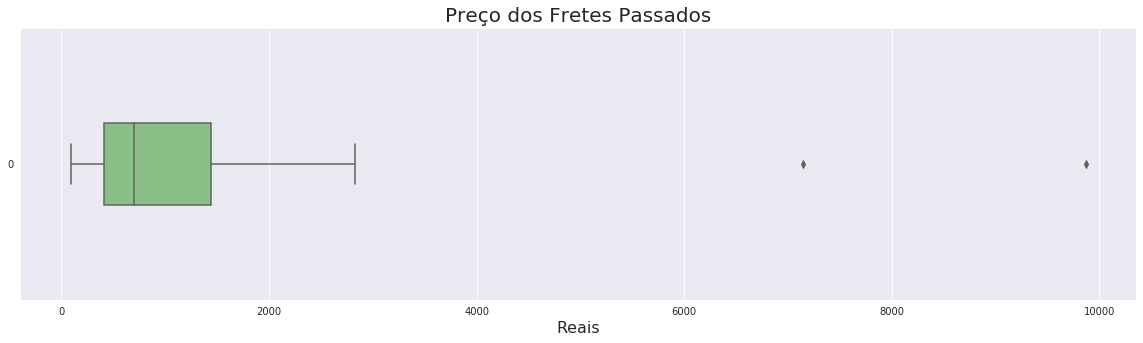

In [10]:
ax = sns.boxplot(data=fretes_passados['preco_frete'], orient='h', width=0.3)
ax.figure.set_size_inches(20, 5)
ax.set_title('Preço dos Fretes Passados', fontsize=20)
ax.set_xlabel('Reais', fontsize=16)
ax

# <font color='red' style='font-size: 30px;'>2.2 Distribuição de Frequências</font>
<hr style='border: 2px solid red;'>

## Distribuição de frequências da variável *dependente* (y)

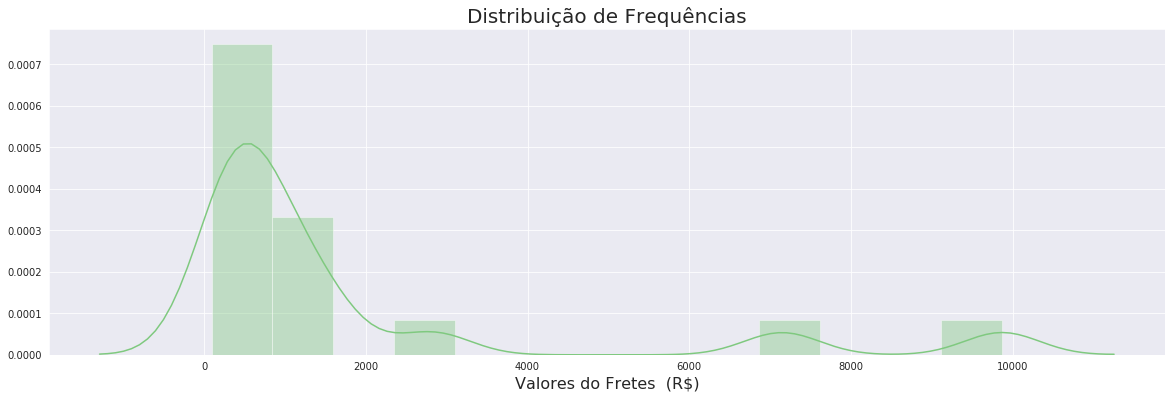

In [11]:
ax = sns.distplot(fretes_passados['preco_frete'])
ax.figure.set_size_inches(20, 6)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_xlabel('Valores do Fretes  (R$)', fontsize=16)
ax

# <font color='red' style='font-size: 30px;'>2.3 Dispersão Entre as Variáveis</font>
<hr style='border: 2px solid red;'>

## Gráficos de dispersão entre as variáveis do dataset

## seaborn.pairplot

https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Plota o relacionamento entre pares de variáveis em um dataset.</p>

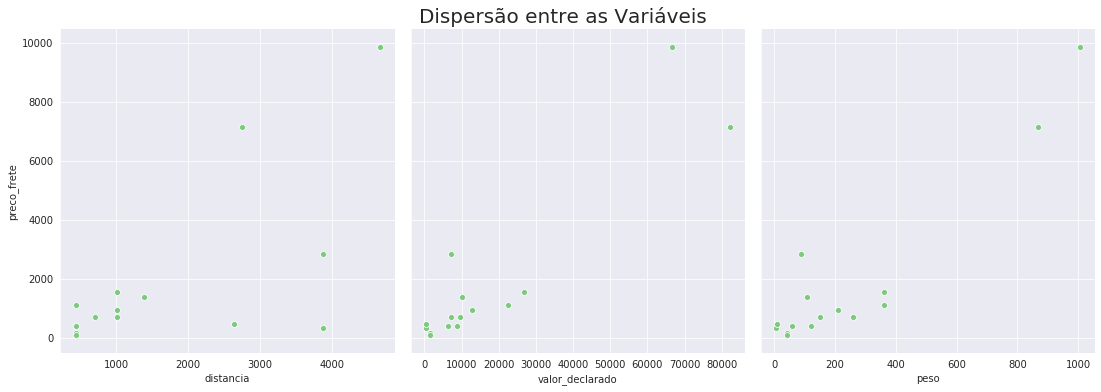

In [14]:
ax = sns.pairplot(fretes_passados, y_vars='preco_frete', x_vars=['distancia', 'valor_declarado', 'peso'], height=5)
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax

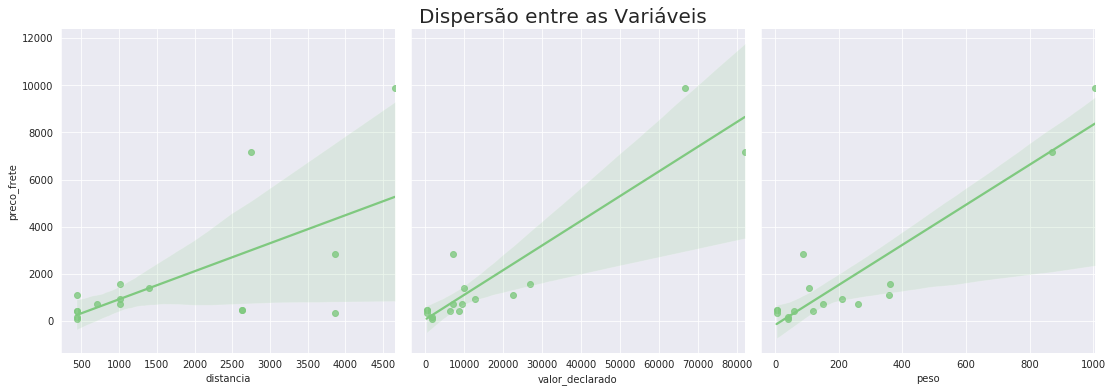

In [21]:
ax = sns.pairplot(fretes_passados, y_vars='preco_frete', x_vars=['distancia', 'valor_declarado', 'peso'], kind='reg', height=5)
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax

# <font color='red' style='font-size: 30px;'>3.1 Transformando os Dados</font>
<hr style='border: 2px solid red;'>

## Distribuição Normal
<hr>

### Por quê? 
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Testes paramétricos assumem que os dados amostrais foram coletados de uma população com distribuição de probabilidade conhecida. Boa parte dos testes estatísticos assumem que os dados seguem uma distribuição normal (t de Student, intervalos de confiança etc.).</p>



<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>

## Importando biblioteca numpy

In [0]:
import numpy as np

## Aplicando a transformação logarítmica aos dados do *dataset*

https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.log.html

In [16]:
np.log(1)

0.0

In [0]:
fretes_passados['log_preco_frete'] = np.log(fretes_passados['preco_frete'])
fretes_passados['log_distancia'] = np.log(fretes_passados['distancia'])
fretes_passados['log_valor_declarado'] = np.log(fretes_passados['valor_declarado'])
fretes_passados['log_peso'] = np.log(fretes_passados['peso'])

In [18]:
fretes_passados.head()

,Cidade,distancia,valor_declarado,lampioes,postes,peso,preco_frete,log_preco_frete,log_distancia,log_valor_declarado,log_lampioes
0,Florianópolis,700,7055.75,0,25,149.75,697.37,6.547316,6.551080,8.861598,5.008967
1,Campina Grande,2630,410.00,1,1,7.61,480.75,6.175347,7.874739,6.016157,2.029463
2,Brasília,1015,26825.89,201,6,361.56,1567.37,7.357154,6.922644,10.197123,5.890428
3,Rio de Janeiro,435,1601.81,0,7,41.93,171.35,5.143708,6.075346,7.378890,3.736002
4,Manaus,3870,7006.61,17,10,87.44,2827.40,7.947113,8.261010,8.854609,4.470953


## Distribuição de frequências da variável *dependente transformada* (y)

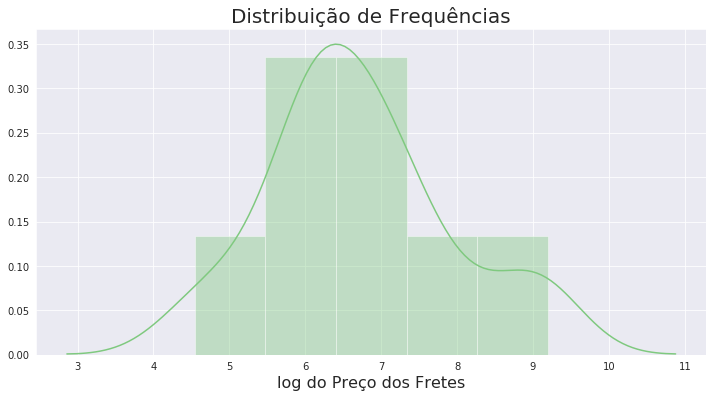

In [25]:
ax = sns.distplot(fretes_passados['log_preco_frete'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_xlabel('log do Preço dos Fretes', fontsize=16)
ax

# <font color='red' style='font-size: 30px;'>3.2 Verificando Relação Linear</font>
<hr style='border: 2px solid red;'>

## Gráficos de dispersão entre as variáveis transformadas do dataset

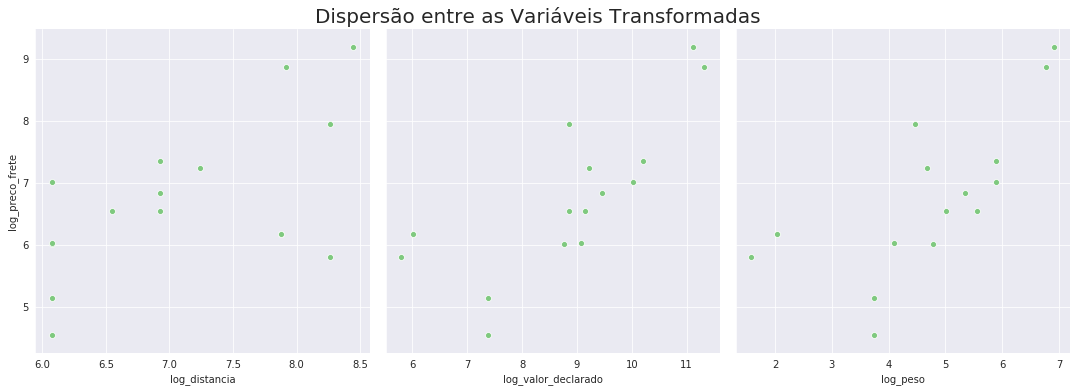

In [28]:
ax = sns.pairplot(fretes_passados, y_vars='log_preco_frete', x_vars=['log_distancia', 'log_valor_declarado', 'log_peso'], height=5)
ax.fig.suptitle('Dispersão entre as Variáveis Transformadas', fontsize=20, y=1.05)
ax

# <font color='red' style='font-size: 30px;'>4.1 Criando os *Datasets* de Treino e Teste</font>
<hr style='border: 2px solid red;'>

## Importando o *train_test_split* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [0]:
from sklearn.model_selection import train_test_split

## Criando uma Series (pandas) para armazenar o Preço dos Imóveis (y)

In [0]:
preco_frete_y = fretes_passados['log_preco_frete']

## Criando um DataFrame (pandas) para armazenar as variáveis explicativas (X)

In [0]:
estimadores_frete_x = fretes_passados[['log_distancia', 'log_valor_declarado', 'log_peso']]

## Criando os datasets de treino e de teste

In [0]:
X_train, X_test, y_train, y_test = train_test_split(estimadores_frete_x, preco_frete_y, test_size=0.2, random_state=7)

# Regressão Linear
<hr>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>A análise de regressão diz respeito ao estudo da dependência de uma variável (a variável <b>dependente</b>) em relação a uma ou mais variáveis, as variáveis explanatórias, visando estimar e/ou prever o valor médio da primeira em termos dos valores conhecidos ou fixados das segundas.</p>


## scikit-learn (https://scikit-learn.org/stable/)

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>O *scikit-learn* é um módulo Python especializado em soluções para *machine learning*.</p>



## Importando a biblioteca statsmodels

https://www.statsmodels.org/stable/index.html

In [0]:
import statsmodels.api as sm

## Estimando o modelo com statsmodels

In [33]:
X_train_com_constante = sm.add_constant(X_train)

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [34]:
X_train_com_constante

,const,log_distancia,log_valor_declarado,log_peso
12,1.0,6.075346,9.079525,4.092677
0,1.0,6.551080,8.861598,5.008967
1,1.0,7.874739,6.016157,2.029463
14,1.0,6.922644,9.155250,5.557600
13,1.0,7.237059,9.212525,4.678049
7,1.0,6.075346,8.768913,4.785824
11,1.0,6.922644,9.463776,5.345439
3,1.0,6.075346,7.378890,3.736002
6,1.0,6.075346,7.378890,3.736002
9,1.0,7.919356,11.315715,6.767527


In [0]:
modelo_statsmodels = sm.OLS(y_train, X_train_com_constante, hasconst = True).fit()

# <font color='red' style='font-size: 30px;'>4.2 Avaliando o Modelo Estimado</font>
<hr style='border: 2px solid red;'>

## Avaliando as estatísticas de teste do modelo

In [36]:
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:        log_preco_frete   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     53.59
Date:                Thu, 20 Feb 2020   Prob (F-statistic):           1.22e-05
Time:                        22:32:31   Log-Likelihood:            -0.00035504
No. Observations:                  12   AIC:                             8.001
Df Residuals:                       8   BIC:                             9.940
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -5.0422    

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


# <font color='red' style='font-size: 30px;'>5.1 Estimando o Modelo com os Dados de Treino</font>
<hr style='border: 2px solid red;'>

## Importando *LinearRegression* e *metrics* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://scikit-learn.org/stable/modules/classes.html#regression-metrics

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Instanciando a classe *LinearRegression()*

In [0]:
modelo = LinearRegression()

## Utilizando o método *fit()* do objeto "modelo" para estimar nosso modelo linear utilizando os dados de TREINO (y_train e X_train)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit

In [41]:
modelo.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Obtendo o coeficiente de determinação (R²) do modelo estimado com os dados de TREINO

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score

### Coeficiente de Determinação - R²

O coeficiente de determinação (R²) é uma medida resumida que diz quanto a linha de regressão ajusta-se aos dados. É um valor entra 0 e 1.

$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}{\sum_{i=0}^{n-1}(y_i-\bar{y}_i)^2}$$

In [42]:
print('R² = {}'.format(modelo.score(X_train, y_train).round(3)))

R² = 0.953


## Gerando previsões para os dados de TESTE (X_test) utilizando o método *predict()* do objeto "modelo"

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict

In [0]:
y_previsto = modelo.predict(X_test)

## Obtendo o coeficiente de determinação (R²) para as previsões do nosso modelo

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score

In [44]:
print('R² = %s' % metrics.r2_score(y_test, y_previsto).round(3))

R² = 0.965


# <font color='red' style='font-size: 30px;'>5.2 Obtendo Previsões Pontuais</font>
<hr style='border: 2px solid red;'>

## Dados de entrada

In [45]:
entrada = X_test[0:1]
entrada

,log_distancia,log_valor_declarado,log_peso
8,8.26101,5.796058,1.581038


## Gerando previsão pontual

In [46]:
modelo.predict(entrada)[0]

6.23074700827154

## Invertendo a transformação para obter a estimativa em R$

https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.exp.html

In [47]:
np.exp(modelo.predict(entrada)[0])

508.13492274636957

# <font color='red' style='font-size: 30px;'>5.3 Interpretação dos Coeficientes Estimados</font>
<hr style='border: 2px solid red;'>

## Obtendo o intercepto do modelo

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>intercepto</b> representa o efeito médio em $Y$ (Preço do Imóveis) tendo todas as variáveis explicativas excluídas do modelo. No caso do modelo log-linear este coeficiente deve ser transformado com o uso da função exponencial para ser apresentado em R$.</p>

In [54]:
modelo.intercept_

-5.042196075194769

In [55]:
np.exp(modelo.intercept_)

0.0064595470793920836

## Obtendo os coeficientes de regressão

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Os <b>coeficientes de regressão</b> $\beta_2$ e $\beta_3$ são conhecidos como <b>coeficientes parciais de regressão</b> ou <b>coeficientes parciais angulares</b>. </p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Um aspecto interessante do modelo log-linear, que o tornou muito utilizado nos trabalhos aplicados, é que os coeficientes angulares $\beta_2$ e $\beta_3$ medem as elasticidades de Y em relação a $X_2$ e $X_3$, isto é, a variação percentual de Y correspondente a uma dada variação percentual (pequena) em $X_2$ e $X_3$.</p>

In [56]:
modelo.coef_

array([ 0.89241708,  0.72113043, -0.17648954])

## Confirmando a ordem das variáveis explicativas no DataFrame

In [59]:
estimadores_frete_x.columns

Index(['log_distancia', 'log_valor_declarado', 'log_peso'], dtype='object')

## Criando uma lista com os nomes das variáveis do modelo

In [0]:
index = ['Intercepto', 'Distancia (km)', 'Valor Declarado (R$)', 'Peso (Kg)']

## Criando um DataFrame para armazenar os coeficientes do modelo

https://docs.scipy.org/doc/numpy/reference/generated/numpy.append.html?#numpy.append

In [62]:
pd.DataFrame(data=np.append(modelo.intercept_, modelo.coef_), index=index, columns=['Parâmetros'])

,Parâmetros
Intercepto,-5.042196
Distancia (km),0.892417
Valor Declarado (R$),0.721130
Peso (Kg),-0.176490


In [63]:
np.exp(-4.680253)

0.009276666593496467

## Interpretação dos Coeficientes Estimados

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Intercepto</b> → Excluindo o efeito das variáveis explicativas ($X_2=X_3=0$) o efeito médio no Preço do frete seria de <b>R$ xxx.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Distância (Km)</b> → Mantendo-se o valor do peso e valor declarado constante, um acréscimo de 1% na distância de entre o destino e a sede da litro de luz gera, em média, um acréscimo de <b> 0,89% </b> no Preço do Frete.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Valor Declarado (R$)</b> → Mantendo-se o valor da distância e peso constantes, um acréscimo de 1% no valor declarado das soluções gera, em média, um acréscimo de <b>0.72%</b> no Preço do Frete.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Peso (R$)</b> → Mantendo-se o valor da distância e valor declarado constante, um acréscimo de 1% no peso das soluções gera, em média, um acréscimo de <b>-0.17%</b> no Preço do Frete.
</p>

# <font color='red' style='font-size: 30px;'>5.4 Análises Gráficas dos Resultados do Modelo</font>
<hr style='border: 2px solid red;'>

## Gerando as previsões do modelo para os dados de TREINO

In [0]:
y_previsto_train = modelo.predict(X_train)

## Gráfico de dispersão entre valor estimado e valor real

https://seaborn.pydata.org/generated/seaborn.scatterplot.html

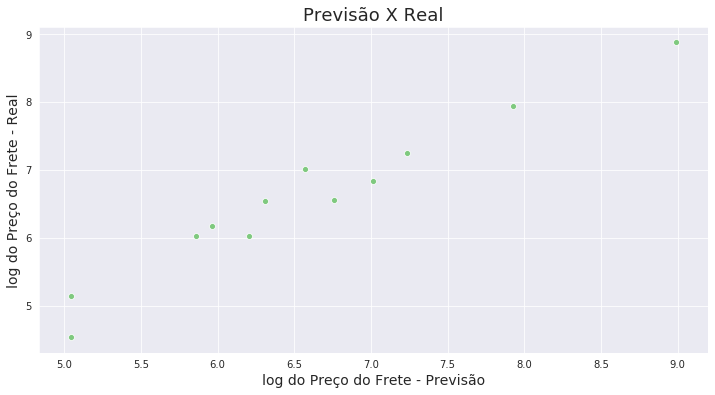

In [65]:
ax = sns.scatterplot(x=y_previsto_train, y=y_train)
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsão X Real', fontsize=18)
ax.set_xlabel('log do Preço do Frete - Previsão', fontsize=14)
ax.set_ylabel('log do Preço do Frete - Real', fontsize=14)
ax

## Obtendo os resíduos

In [0]:
residuo = y_train - y_previsto_train

## Plotando a distribuição de frequências dos resíduos

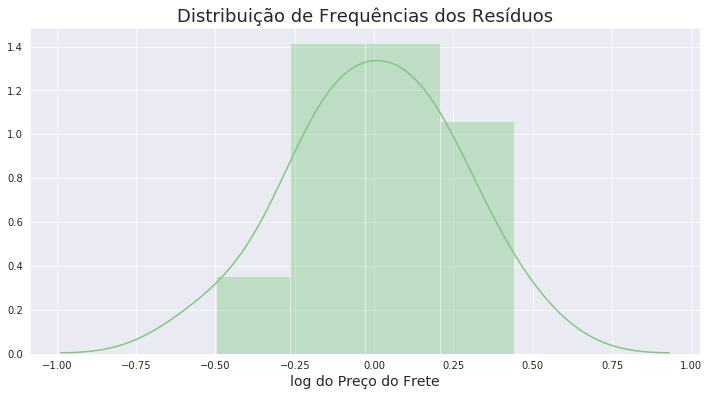

In [67]:
ax = sns.distplot(residuo)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências dos Resíduos', fontsize=18)
ax.set_xlabel('log do Preço do Frete', fontsize=14)
ax

## Simulador de frete (Produção)

In [53]:
#cidade = caixa de diálogo para o usuário escolher dentre as opções
#cidade = Fazer um dicionário aqui com os dados passados de frete
distancia = puxar do dicionário
#lampioes = caixa de diálogo para digitar o número de lampiões
#postes = caixa de diálogo para digitar o número de postes
valor_declarado = postes*(132.4) + lampioes*(269.2)
peso = postes*(6) + lampioes*(1.7)
entrada = [[np.log(valor_declarado), np.log(distancia), np.log(peso)]]

print('R$ {0:.2f}'.format(np.exp(modelo.predict(entrada)[0])))

R$ 4240.99
